## Import Libraries
---

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

## Load Datasets
---

In [2]:
# train dataset
df_train = pd.read_csv("../project_2-Jance-submission/datasets/train.csv")
pd.set_option('display.max_columns', 100)
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
df_train.shape

(2051, 81)

In [4]:
# test dataset
df_test = pd.read_csv("../project_2-Jance-submission/datasets/test.csv")
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
df_test.shape

(878, 80)

## Data Cleaning - Train Set
---

In [6]:
# Check for nulls
pd.set_option('display.max_rows', 2500)
df_train.isna().sum().sort_values(ascending = False)

Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Finish       114
Garage Qual         114
Garage Yr Blt       114
Garage Cond         114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
BsmtFin Type 1       55
Bsmt Cond            55
Bsmt Qual            55
Mas Vnr Area         22
Mas Vnr Type         22
Bsmt Half Bath        2
Bsmt Full Bath        2
Garage Area           1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
BsmtFin SF 1          1
Garage Cars           1
Mo Sold               0
Sale Type             0
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
Yr Sold               0
Misc Val              0
Pool Area             0
Screen Porch          0
TotRms AbvGrd         0
Functional            0
Fireplaces            0
3Ssn Porch            0
Enclosed Porch  

In [7]:
# Sample check the NAs
df_train[df_train['Pool QC'].notna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
52,2351,527356020,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790.0,LwQ,469.0,133.0,1392.0,GasA,TA,Y,SBrkr,1392,1392,0,2784,1.0,0.0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2.0,564.0,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,250000
657,1567,914475020,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,522.0,Unf,0.0,574.0,1096.0,GasA,TA,Y,SBrkr,1118,0,0,1118,1.0,0.0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1977.0,Fin,1.0,358.0,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,NaN,0,7,2008,WD,171000
761,2499,532476050,80,RL,100.0,14330,Pave,NaN,IR1,Low,AllPub,Corner,Gtl,Veenker,Norm,Norm,1Fam,SLvl,7,4,1974,1974,Gable,CompShg,WdShing,Wd Sdng,BrkFace,145.0,Gd,Fa,CBlock,Gd,TA,Gd,ALQ,1023.0,BLQ,497.0,228.0,1748.0,GasA,Gd,Y,SBrkr,2151,495,0,2646,1.0,2.0,2,0,3,1,Gd,9,Mod,4,TA,Attchd,1974.0,RFn,2.0,550.0,TA,TA,Y,641,100,0,0,0,800,Gd,GdPrv,NaN,0,1,2006,WD,260000
952,2231,909475230,20,RL,70.0,18044,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,8,5,1986,1986,Gable,CompShg,WdShing,Plywood,None,0.0,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,279.0,279.0,GasA,Gd,Y,SBrkr,2726,0,0,2726,0.0,0.0,2,1,2,1,Gd,6,Typ,1,Gd,Attchd,1986.0,Fin,2.0,691.0,Gd,Gd,Y,216,64,169,0,0,228,Ex,NaN,NaN,0,8,2007,WD,315000
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1130,2358,527377030,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663.0,LwQ,377.0,0.0,1040.0,GasA,Fa,Y,SBrkr,1309,0,0,1309,1.0,0.0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2.0,484.0,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,NaN,0,1,2006,WD,181000
1249,2736,905426150,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Flat,Tar&Grv,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,Gd,TA,Av,Unf,0.0,Unf,0.0,697.0,697.0,GasA,TA,Y,SBrkr,1575,626,0,2201,0.0,0.0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1966.0,Unf,2.0,432.0,Gd,Gd,Y,586,236,0,0,0,738,Gd,GdPrv,NaN,0,8,2006,WD,274970
1635,1941,535353050,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1953,1953,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,595.0,Rec,354.0,156.0,1105.0,GasA,Gd,Y,SBrkr,1647,0,0,1647,1.0,0.0,1,0,3,1,TA,6,Min1,1,Fa,Attchd,1953.0,Fin,1.0,280.0,TA,TA,Y,225,0,0,0,0,368,TA,GdPrv,NaN,0,2,2007,WD,153000
1875,2279,923202220,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,2034,

In [8]:
#drop NA that is less than 100
df_train.dropna(subset = ["BsmtFin SF 1",
                    "Total Bsmt SF",
                    "BsmtFin SF 2",
                    "Bsmt Unf SF",
                    "Garage Area",
                    "Garage Cars",
                    "Bsmt Full Bath",
                    "Bsmt Half Bath",
                    "Mas Vnr Area",
                    "Mas Vnr Type",
                    "Bsmt Qual",
                    "Bsmt Cond",
                    "BsmtFin Type 1",
                    "BsmtFin Type 2",
                    "Bsmt Exposure"], inplace = True)

In [9]:
# Check that that drop is inplace
df_train.isna().sum().sort_values(ascending = False)

Pool QC            1961
Misc Feature       1907
Alley              1832
Fence              1576
Fireplace Qu        946
Lot Frontage        315
Garage Type         103
Garage Yr Blt       103
Garage Finish       103
Garage Qual         103
Garage Cond         103
Kitchen AbvGr         0
Functional            0
TotRms AbvGrd         0
Kitchen Qual          0
Id                    0
Bedroom AbvGr         0
Half Bath             0
Fireplaces            0
Bsmt Half Bath        0
Bsmt Full Bath        0
Gr Liv Area           0
Low Qual Fin SF       0
2nd Flr SF            0
1st Flr SF            0
Full Bath             0
Garage Area           0
Garage Cars           0
Central Air           0
Paved Drive           0
Wood Deck SF          0
Open Porch SF         0
Enclosed Porch        0
3Ssn Porch            0
Screen Porch          0
Pool Area             0
Misc Val              0
Mo Sold               0
Yr Sold               0
Sale Type             0
Electrical            0
Heating         

### Filling NaN

It is observed that cells with NaN indicate not application, meaning the house does not have the feature.
This is also same as what is stated in the data dictionary in Kaggle.
https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/data

Example:<br>
NaN in 'Pool QC' is due to the house not having a pool.<br><br>
Hence, decided to fill NaN with zeros if data type is integer and 'NA' if data type is string

In [10]:
# if dtype = object, fill NaN with 'NA'
# if dtype = int or float, fill NaN with 0
for col in df_train:
    #get dtype for column
    dt = df_train[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        df_train[col].fillna(0, inplace=True)
    else:
        df_train[col].fillna('NA', inplace=True)

In [11]:
# Check that there is no more NaNs
df_train.isna().sum().sort_values(ascending = False)

Id                 0
Heating QC         0
Garage Type        0
Fireplace Qu       0
Fireplaces         0
Functional         0
TotRms AbvGrd      0
Kitchen Qual       0
Kitchen AbvGr      0
Bedroom AbvGr      0
Half Bath          0
Full Bath          0
Bsmt Half Bath     0
Bsmt Full Bath     0
Gr Liv Area        0
Low Qual Fin SF    0
2nd Flr SF         0
1st Flr SF         0
Electrical         0
Garage Yr Blt      0
Garage Finish      0
Garage Cars        0
Pool Area          0
Sale Type          0
Yr Sold            0
Mo Sold            0
Misc Val           0
Misc Feature       0
Fence              0
Pool QC            0
Screen Porch       0
Garage Area        0
3Ssn Porch         0
Enclosed Porch     0
Open Porch SF      0
Wood Deck SF       0
Paved Drive        0
Garage Cond        0
Garage Qual        0
Central Air        0
Heating            0
PID                0
Total Bsmt SF      0
Overall Qual       0
House Style        0
Bldg Type          0
Condition 2        0
Condition 1  

In [12]:
#change column name to lowercase and replace 'space' with 'underscore'
df_train.columns = df_train.columns.str.replace(' ', '_').str.lower()
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [13]:
# drop id as it is an identification number 
df_train.drop(columns=['id'], inplace=True)

In [14]:
# Check data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              1969 non-null   int64  
 1   ms_subclass      1969 non-null   int64  
 2   ms_zoning        1969 non-null   object 
 3   lot_frontage     1969 non-null   float64
 4   lot_area         1969 non-null   int64  
 5   street           1969 non-null   object 
 6   alley            1969 non-null   object 
 7   lot_shape        1969 non-null   object 
 8   land_contour     1969 non-null   object 
 9   utilities        1969 non-null   object 
 10  lot_config       1969 non-null   object 
 11  land_slope       1969 non-null   object 
 12  neighborhood     1969 non-null   object 
 13  condition_1      1969 non-null   object 
 14  condition_2      1969 non-null   object 
 15  bldg_type        1969 non-null   object 
 16  house_style      1969 non-null   object 
 17  overall_qual  

## Data Cleaning - Test Set
---

In [15]:
# Check for nulls
df_test.isna().sum().sort_values(ascending = False)

Pool QC            874
Misc Feature       837
Alley              820
Fence              706
Fireplace Qu       422
Lot Frontage       160
Garage Yr Blt       45
Garage Finish       45
Garage Qual         45
Garage Cond         45
Garage Type         44
BsmtFin Type 1      25
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 2      25
Electrical           1
Mas Vnr Type         1
Mas Vnr Area         1
Kitchen AbvGr        0
TotRms AbvGrd        0
Bedroom AbvGr        0
Half Bath            0
Full Bath            0
Bsmt Half Bath       0
Bsmt Full Bath       0
Gr Liv Area          0
Kitchen Qual         0
Id                   0
Functional           0
Fireplaces           0
2nd Flr SF           0
Garage Cars          0
Garage Area          0
Paved Drive          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold    

In [16]:
#drop NA that is less than 44 (5%)
df_test.dropna(subset = ["BsmtFin Type 1",
                    "Bsmt Qual",
                    "Bsmt Cond",
                    "Bsmt Exposure",
                    "BsmtFin Type 2",
                    "Electrical",
                    "Mas Vnr Type",
                    "Mas Vnr Area"], inplace = True)

In [17]:
# Check that that drop is inplace
df_test.isna().sum().sort_values(ascending = False)

Pool QC            847
Misc Feature       812
Alley              794
Fence              683
Fireplace Qu       403
Lot Frontage       155
Garage Yr Blt       40
Garage Finish       40
Garage Qual         40
Garage Cond         40
Garage Type         39
Id                   0
Bedroom AbvGr        0
Kitchen Qual         0
Kitchen AbvGr        0
Bsmt Half Bath       0
Half Bath            0
Full Bath            0
Functional           0
Bsmt Full Bath       0
Gr Liv Area          0
Low Qual Fin SF      0
2nd Flr SF           0
1st Flr SF           0
Electrical           0
TotRms AbvGrd        0
Garage Cars          0
Fireplaces           0
Heating QC           0
Garage Area          0
Paved Drive          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
Central Air          0
Heating              0
PID                  0
Land Slope 

In [18]:
# if dtype = object, fill NaN with 'NA'
# if dtype = int or float, fill NaN with 0
for col in df_test:
    #get dtype for column
    dt = df_test[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        df_test[col].fillna(0, inplace=True)
    else:
        df_test[col].fillna('NA', inplace=True)

In [19]:
# Check that there is no more NaNs
df_test.isna().sum().sort_values(ascending = False)

Id                 0
PID                0
Fireplace Qu       0
Fireplaces         0
Functional         0
TotRms AbvGrd      0
Kitchen Qual       0
Kitchen AbvGr      0
Bedroom AbvGr      0
Half Bath          0
Full Bath          0
Bsmt Half Bath     0
Bsmt Full Bath     0
Gr Liv Area        0
Low Qual Fin SF    0
2nd Flr SF         0
1st Flr SF         0
Electrical         0
Central Air        0
Garage Type        0
Garage Yr Blt      0
Garage Finish      0
Screen Porch       0
Yr Sold            0
Mo Sold            0
Misc Val           0
Misc Feature       0
Fence              0
Pool QC            0
Pool Area          0
3Ssn Porch         0
Garage Cars        0
Enclosed Porch     0
Open Porch SF      0
Wood Deck SF       0
Paved Drive        0
Garage Cond        0
Garage Qual        0
Garage Area        0
Heating QC         0
Heating            0
Total Bsmt SF      0
Utilities          0
House Style        0
Bldg Type          0
Condition 2        0
Condition 1        0
Neighborhood 

In [20]:
#change column name to lowercase and replace 'space' with 'underscore'
df_test.columns = df_test.columns.str.replace(' ', '_').str.lower()
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD


In [21]:
# drop id as it is an identification number 
df_test.drop(columns=['id'], inplace=True)

In [22]:
# Check data type
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 877
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              851 non-null    int64  
 1   ms_subclass      851 non-null    int64  
 2   ms_zoning        851 non-null    object 
 3   lot_frontage     851 non-null    float64
 4   lot_area         851 non-null    int64  
 5   street           851 non-null    object 
 6   alley            851 non-null    object 
 7   lot_shape        851 non-null    object 
 8   land_contour     851 non-null    object 
 9   utilities        851 non-null    object 
 10  lot_config       851 non-null    object 
 11  land_slope       851 non-null    object 
 12  neighborhood     851 non-null    object 
 13  condition_1      851 non-null    object 
 14  condition_2      851 non-null    object 
 15  bldg_type        851 non-null    object 
 16  house_style      851 non-null    object 
 17  overall_qual    

## Create the Base Model
---

In [23]:
# split df_train into train/test sets
train, test = train_test_split(df_train,
                               test_size = 0.2,
                               random_state = 42
                              )

In [24]:
# Check train set
train.shape

(1575, 80)

In [25]:
# Check test set
test.shape

(394, 80)

In [26]:
# Define X_train and y_train
X_train = train.drop('saleprice', axis = 1)
y_train = train['saleprice']

In [27]:
# Top 10 features that have the highest correlation with saleprice
corr_with_y = abs(X_train.corrwith(y_train))
corr_with_y.sort_values(ascending = False).head(10)

overall_qual      0.795256
gr_liv_area       0.705184
garage_area       0.653504
garage_cars       0.649668
1st_flr_sf        0.609854
total_bsmt_sf     0.602437
full_bath         0.564183
year_built        0.563453
year_remod/add    0.542831
totrms_abvgrd     0.531359
dtype: float64

In [28]:
# Define X_test and y_test
X_test = test.drop('saleprice', axis = 1)
y_test = test['saleprice']

In [29]:
# Set Numeric and Categorical columns in X_train
num_col_tr = X_train.dtypes[X_train.dtypes != "object"].index
cat_col_tr = X_train.dtypes[X_train.dtypes == "object"].index

In [30]:
cat_col_tr

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')

In [31]:
# Check numeric columns
num_col_tr

Index(['pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold'],
      dtype='object')

In [32]:
# Create pipelines for numerical features
num_pipe = Pipeline(steps=[
    ('scale',StandardScaler())])

In [33]:
# Create pipelines for categorical features
cat_pipe = Pipeline(steps=[
    ('or_en',OrdinalEncoder(categories='auto', handle_unknown = 'use_encoded_value', unknown_value = -1))])

In [34]:
# Create ColumnTransformer to apply pipeline for each column type
col_trans = ColumnTransformer(transformers=[
    ('num_pipe',num_pipe,num_col_tr),
    ('cat_pipe',cat_pipe,cat_col_tr)
    ])

In [35]:
# Add a model to a final pipeline, clf_pipe
clf = LinearRegression()
clf_pipe = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', clf)
])

In [36]:
# Train the train set
clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',...
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [37]:
# Train set's score
clf_pipe.score(X_train, y_train)

0.8675819627786068

In [38]:
# Test set's score
clf_pipe.score(X_test, y_test)

0.8752844631194592

## Evaluate the Base Model
---

### Root Mean Squared Error (RMSE)

In [39]:
# y_pred
y_pred = clf_pipe.predict(X_test)

In [40]:
# RMSE
mean_squared_error(y_test, y_pred, squared=False)

27994.565400916683

In [41]:
# y_test mean
y_test.mean()

185504.51269035533

In [42]:
# % of error
mean_squared_error(y_test, y_pred, squared=False)/y_test.mean()

0.1509104279724197

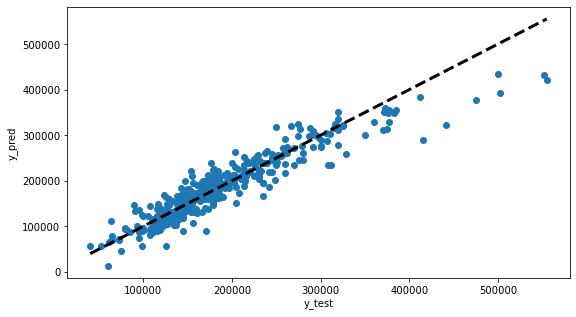

In [43]:
# Plot y_test against y_pred
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')
plt.show()

**Conclusion**<br>
It shows that the model does not work well when the sales price is about more than 400,000.<br>
In OLS regression, it assumes homoskedasticity.

## Coefficients, Lasso and Ridge for Feature Selection
---

### Coefficients

In [44]:
cat_col_tr_new = clf_pipe.named_steps["col_trans"].named_transformers_["cat_pipe"]\
.named_steps["or_en"].get_feature_names_out(cat_col_tr)

In [45]:
# concatenate categorical columns with numerical columns to get all columns
all_cols = np.concatenate([num_col_tr, cat_col_tr_new])

In [46]:
# Find the coefficient
coefs = clf_pipe.named_steps["model"].coef_.flatten()
coef = pd.DataFrame(zip(all_cols, coefs), columns=['feature', 'coef'])
coef['abs_coef'] = coef['coef'].apply(lambda x: abs(x))
coef['colors'] = coef['coef'].apply(lambda x: 'green' if x > 0 else 'red')
coef = coef.sort_values('abs_coef', ascending=False)

In [47]:
coef

,feature,coef,abs_coef,colors
16,gr_liv_area,-2.900395e+17,2.900395e+17,red
14,2nd_flr_sf,2.452981e+17,2.452981e+17,green
13,1st_flr_sf,2.280356e+17,2.280356e+17,green
9,bsmtfin_sf_1,-1.238692e+17,1.238692e+17,red
11,bsmt_unf_sf,-1.182468e+17,1.182468e+17,red
12,total_bsmt_sf,1.127226e+17,1.127226e+17,green
10,bsmtfin_sf_2,-4.296631e+16,4.296631e+16,red
15,low_qual_fin_sf,2.669409e+16,2.669409e+16,green
42,utilities,-4.059896e+04,4.059896e+04,red
38,street,2.441840e+04,2.441840e+04,green


Text(0.5, 0, 'Feature')

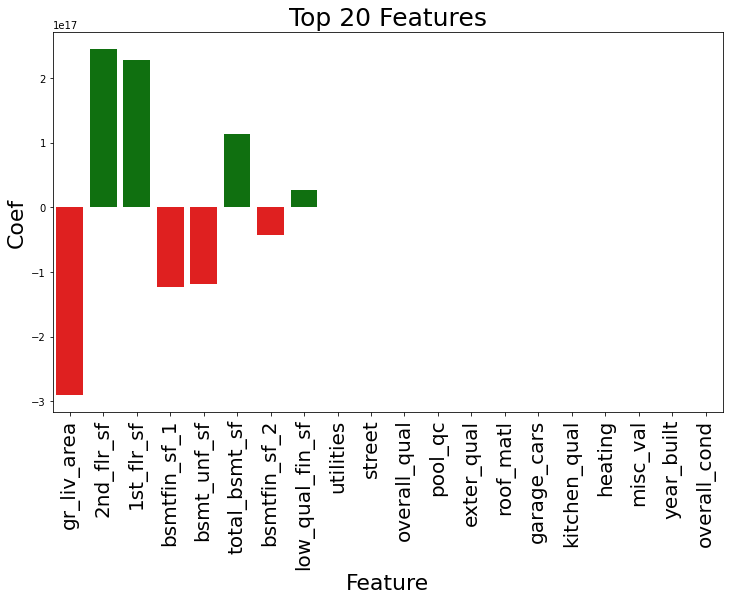

In [48]:
# Plot coefficients of features
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x='feature',
            y='coef',
            data=coef.head(20),
           palette=coef.head(20)['colors'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title('Top 20 Features', fontsize=25)
ax.set_ylabel('Coef', fontsize=22)
ax.set_xlabel('Feature', fontsize=22)

### Lasso

In [49]:
# Replace Linear Regresstion with lasso model in final pipeline
lasso = LassoCV()
lasso_pipe = Pipeline(steps=[
    ('col_trans', col_trans),
    ('lasso', lasso)
])

In [50]:
# Train Lasso model
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',...
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object'))])),
                ('lasso', LassoCV())])

In [51]:
# Train set's score
lasso_pipe.score(X_train, y_train)

0.8531800593830888

In [52]:
# Test set's score
lasso_pipe.score(X_test, y_test)

0.8691068277541787

In [53]:
# Find the coefficient
lasso_coef = lasso_pipe.named_steps["lasso"].coef_
lasso_coef = pd.DataFrame(zip(all_cols, coefs), columns=['feature', 'coef'])
lasso_coef['abs_coef'] = lasso_coef['coef'].apply(lambda x: abs(x))
lasso_coef['colors'] = lasso_coef['coef'].apply(lambda x: 'green' if x > 0 else 'red')
lasso_coef = lasso_coef.sort_values('abs_coef', ascending=False)
lasso_coef.head(20)

,feature,coef,abs_coef,colors
16,gr_liv_area,-2.900395e+17,2.900395e+17,red
14,2nd_flr_sf,2.452981e+17,2.452981e+17,green
13,1st_flr_sf,2.280356e+17,2.280356e+17,green
9,bsmtfin_sf_1,-1.238692e+17,1.238692e+17,red
11,bsmt_unf_sf,-1.182468e+17,1.182468e+17,red
12,total_bsmt_sf,1.127226e+17,1.127226e+17,green
10,bsmtfin_sf_2,-4.296631e+16,4.296631e+16,red
15,low_qual_fin_sf,2.669409e+16,2.669409e+16,green
42,utilities,-4.059896e+04,4.059896e+04,red
38,street,2.441840e+04,2.441840e+04,green


Text(0.5, 0, 'Feature')

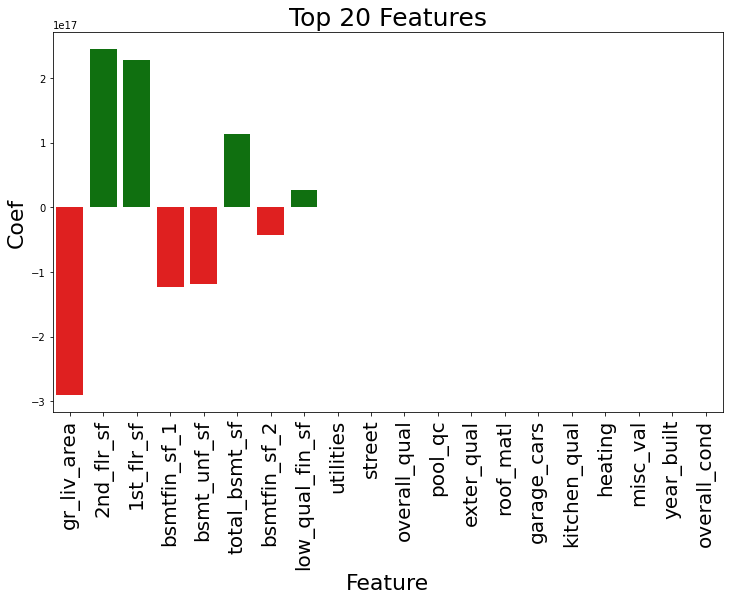

In [54]:
# Plot Lasso coefficient
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x='feature',
            y='coef',
            data=lasso_coef.head(20),
           palette=lasso_coef.head(20)['colors'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title('Top 20 Features', fontsize=25)
ax.set_ylabel('Coef', fontsize=22)
ax.set_xlabel('Feature', fontsize=22)

### Ridge

In [55]:
# Replace Linear Regresstion with lasso model in final pipeline
ridge = RidgeCV()
ridge_pipe = Pipeline(steps=[
    ('col_trans', col_trans),
    ('ridge', ridge)
])

In [56]:
# Train ridge model
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',...
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object'))])),
                ('ridge', RidgeCV())])

In [57]:
# Train set's score
ridge_pipe.score(X_train, y_train) 

0.8686584589216907

In [58]:
# Test set's score
ridge_pipe.score(X_test, y_test)

0.8750904055817352

In [59]:
# Find the coefficient
ridge_coef = ridge_pipe.named_steps["ridge"].coef_
ridge_coef = pd.DataFrame(zip(all_cols, coefs), columns=['feature', 'coef'])
ridge_coef['abs_coef'] = ridge_coef['coef'].apply(lambda x: abs(x))
ridge_coef['colors'] = ridge_coef['coef'].apply(lambda x: 'green' if x > 0 else 'red')
ridge_coef = ridge_coef.sort_values('abs_coef', ascending=False)
ridge_coef.head(20)

,feature,coef,abs_coef,colors
16,gr_liv_area,-2.900395e+17,2.900395e+17,red
14,2nd_flr_sf,2.452981e+17,2.452981e+17,green
13,1st_flr_sf,2.280356e+17,2.280356e+17,green
9,bsmtfin_sf_1,-1.238692e+17,1.238692e+17,red
11,bsmt_unf_sf,-1.182468e+17,1.182468e+17,red
12,total_bsmt_sf,1.127226e+17,1.127226e+17,green
10,bsmtfin_sf_2,-4.296631e+16,4.296631e+16,red
15,low_qual_fin_sf,2.669409e+16,2.669409e+16,green
42,utilities,-4.059896e+04,4.059896e+04,red
38,street,2.441840e+04,2.441840e+04,green


Text(0.5, 0, 'Feature')

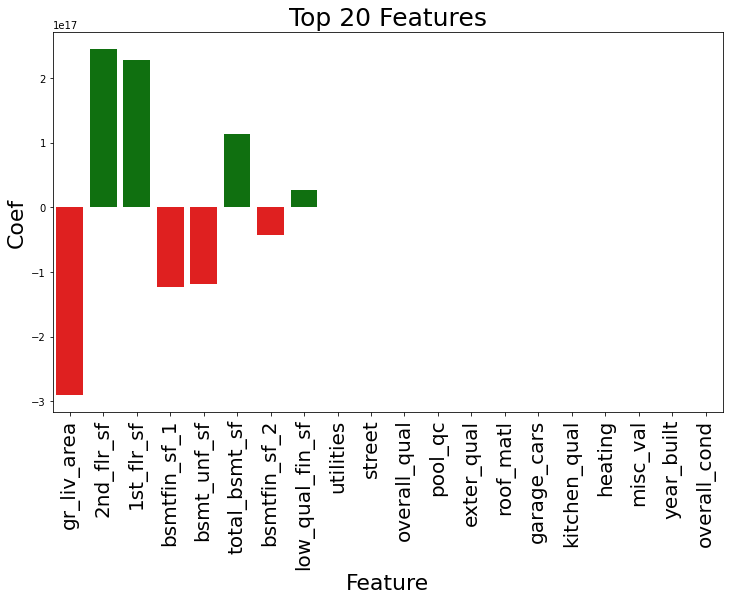

In [60]:
# Plot ridge coefficient
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x='feature',
            y='coef',
            data=ridge_coef.head(20),
           palette=ridge_coef.head(20)['colors'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title('Top 20 Features', fontsize=25)
ax.set_ylabel('Coef', fontsize=22)
ax.set_xlabel('Feature', fontsize=22)

**Conclusion**<br>
The base model's coefficients, Lasso and Ridge all show the same top 20 features.

## KNN
---

In [61]:
# Replace Linear Regresstion with KNN model in final pipeline
knn = KNeighborsClassifier(n_neighbors=3)
knn_pipe = Pipeline(steps=[
    ('col_trans', col_trans),
    ('knn', knn)
])

In [62]:
# Train knn model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',...
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object'))])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [63]:
# Train set's score
knn_pipe.score(X_train, y_train)

0.2838095238095238

In [64]:
# Train set's score
knn_pipe.score(X_test, y_test)

0.005076142131979695

In [65]:
# y_pred
y_pred_knn = knn_pipe.predict(X_test)

In [66]:
# RMSE
mean_squared_error(y_test, y_pred_knn, squared=False)

50540.32503428392

**Conclusion**<br>
KNN is not a good fit.

## Choosing number of Features and degree of PolynomialFeatures
---

In [67]:
score={}
for i in range(16,22): # test 18 to 21 features
# select 18 to 21 features with the highest absolute coefficient and plug it into X_train_new
    X_train_new = train[[column for column in coef.nlargest(i, 'abs_coef')['feature'] \
                         if any(train.isin(coef.nlargest(i, 'abs_coef')['feature']))]] 
    
    num_col_new = X_train_new.dtypes[X_train_new.dtypes != "object"].index # define numeric columns
    cat_col_new = X_train_new.dtypes[X_train_new.dtypes == "object"].index # define categorial columns
    
    # new numeric columns pipeline by adding PolynomialFeatures
    for d in range(1,4): #test polynomial degree of 2 to 5
        num_pipe1 = Pipeline(steps=[
        ('poly',PolynomialFeatures(degree = d)),
        ('scale',StandardScaler())])
        
         # new ColumnTransformer pipeline
        col_trans_new = ColumnTransformer(transformers=[
        ('num_pipe1',num_pipe1,num_col_new),
        ('cat_pipe',cat_pipe,cat_col_new)
        ])
        
        # add Linear Regression to finalize pipeline
        clf = LinearRegression() 
        clf_pipe_new = Pipeline(steps=[
        ('col_trans_new', col_trans_new),
        ('model', clf)
        ])
        
        # fit model
        clf_pipe_new.fit(X_train_new, y_train)
        
        # add train score and test score to score for each number of features and polynomial degree
        score[i,d]=[clf_pipe_new.score(X_train_new, y_train),clf_pipe_new.score(X_test, y_test)]

In [68]:
score

{(16, 1): [0.8085859778991429, 0.8477037253046537],
 (16, 2): [0.8602171949978904, 0.820919389205099],
 (16, 3): [0.9138005677260983, -4.551092493034032e+20],
 (17, 1): [0.8109550025428196, 0.8471669084871187],
 (17, 2): [0.8797302404772291, 0.8495433879554118],
 (17, 3): [0.9151725246792574, -2.3286364554134041e+21],
 (18, 1): [0.8207625262522545, 0.8447629505484077],
 (18, 2): [0.8942253508466855, 0.8884536166606298],
 (18, 3): [0.9172557765590352, -7.781396255349214e+20],
 (19, 1): [0.8237561532402491, 0.8465333789716442],
 (19, 2): [0.8938766148357916, 0.8739046873997671],
 (19, 3): [0.9250113058441862, -1.3818772605484009e+20],
 (20, 1): [0.8289948819962333, 0.8499691560965067],
 (20, 2): [0.9105960023293479, 0.899530992534386],
 (20, 3): [0.9375614511613858, -2.9701094518664607e+20],
 (21, 1): [0.8301890932226406, 0.8476074803611771],
 (21, 2): [0.9124880617298665, 0.8731176758997015],
 (21, 3): [0.9424463217104001, -2.8193943011346645e+20]}

**Conclusion**<br>
The best combination of number of features and polynomial degree is 20 and 2 respectively.

## Fitting the Final Model
---

In [69]:
# repeat the above steps with 20 features and polynomial degree of 2, and fit the model
X_train_new = train[[column for column in coef.nlargest(20, 'abs_coef')['feature'] if\
                     any(train.isin(coef.nlargest(20, 'abs_coef')['feature']))]]
num_col_new = X_train_new.dtypes[X_train_new.dtypes != "object"].index
cat_col_new = X_train_new.dtypes[X_train_new.dtypes == "object"].index

In [70]:
num_pipe1 = Pipeline(steps=[
('poly',PolynomialFeatures(degree = 2)),
('scale',StandardScaler())])
col_trans_new = ColumnTransformer(transformers=[
('num_pipe1',num_pipe1,num_col_new),
('cat_pipe',cat_pipe,cat_col_new)
])
clf = LinearRegression()
clf_pipe_new1 = Pipeline(steps=[
('col_trans_new', col_trans_new),
('model', clf)
])
clf_pipe_new1.fit(X_train_new, y_train)

Pipeline(steps=[('col_trans_new',
                 ColumnTransformer(transformers=[('num_pipe1',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['gr_liv_area', '2nd_flr_sf', '1st_flr_sf', 'bsmtfin_sf_1',
       'bsmt_unf_sf', 'total_bsmt_sf', 'bsmtfin_sf_2', 'low_qual_fin_sf',
       'overall_qual', 'garage_cars', 'misc_val', 'year_built',
       'overall_cond'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('or_en',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['utilities', 'street', 'pool_qc', 'exter_qual', 'roof_matl',
       'kitchen_qual', 'heating'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [71]:
# Train set's score
clf_pipe_new1.score(X_train_new, y_train)

0.9105960023293479

In [72]:
# Test set's score
clf_pipe_new1.score(X_test, y_test)

0.899530992534386

In [73]:
# y_pred
y_pred1 = clf_pipe_new1.predict(X_test)

In [74]:
# RMSE
mean_squared_error(y_test, y_pred1, squared=False)

25126.355803988718

In [75]:
# y_test mean
y_test.mean()

185504.51269035533

In [76]:
# % of error
mean_squared_error(y_test, y_pred1, squared=False)/y_test.mean()

0.13544875776650084

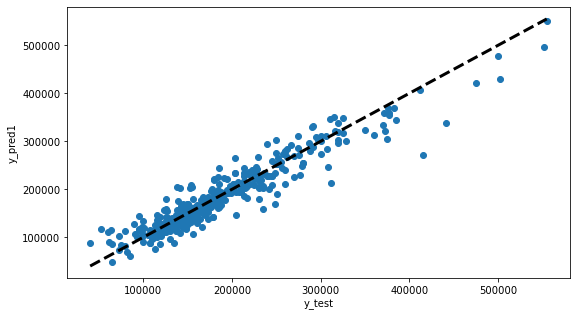

In [77]:
# Plot y_test against y_pred1
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.scatter(y_test, y_pred1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred1')
plt.show()

**Conclusion**<br>
The plot of y_test against y_pred1 shows a better fit than the initial model except for a few more obvious outliers.

In [78]:
num_col_new_new = clf_pipe_new1.named_steps["col_trans_new"].named_transformers_["num_pipe1"]\
.named_steps["poly"].get_feature_names_out(num_col_new)

In [79]:
cat_col_new_new = clf_pipe_new1.named_steps["col_trans_new"].named_transformers_["cat_pipe"]\
.named_steps["or_en"].get_feature_names_out(cat_col_new)

In [80]:
# concatenate categorical columns with numerical columns to get all columns
all_cols1 = np.concatenate([num_col_new_new, cat_col_new_new])

In [81]:
# Find the coefficient
coefs1 = clf_pipe_new1.named_steps["model"].coef_.flatten()
coef1 = pd.DataFrame(zip(all_cols1, coefs), columns=['feature', 'coef'])
coef1['abs_coef'] = coef1['coef'].apply(lambda x: abs(x))
coef1['colors'] = coef1['coef'].apply(lambda x: 'green' if x > 0 else 'red')
coef1 = coef1.sort_values('abs_coef', ascending=False)
coef1.head(10)

,feature,coef,abs_coef,colors
16,gr_liv_area 1st_flr_sf,-2.900395e+17,2.900395e+17,red
14,gr_liv_area^2,2.452981e+17,2.452981e+17,green
13,overall_cond,2.280356e+17,2.280356e+17,green
9,overall_qual,-1.238692e+17,1.238692e+17,red
11,misc_val,-1.182468e+17,1.182468e+17,red
12,year_built,1.127226e+17,1.127226e+17,green
10,garage_cars,-4.296631e+16,4.296631e+16,red
15,gr_liv_area 2nd_flr_sf,2.669409e+16,2.669409e+16,green
42,1st_flr_sf total_bsmt_sf,-4.059896e+04,4.059896e+04,red
38,2nd_flr_sf overall_cond,2.441840e+04,2.441840e+04,green


Text(0.5, 0, 'Feature')

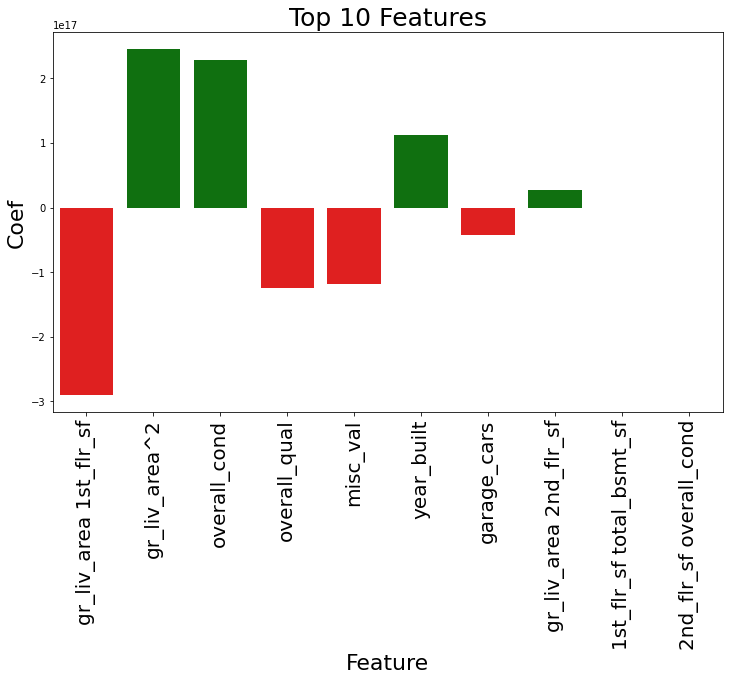

In [82]:
# Plot coefficients of features
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x='feature',
            y='coef',
            data=coef1.head(10),
           palette=coef1.head(10)['colors'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title('Top 10 Features', fontsize=25)
ax.set_ylabel('Coef', fontsize=22)
ax.set_xlabel('Feature', fontsize=22)

## Apply Model to Test Set and Predict Sales Price
---

In [83]:
# Define X
X_test_test = df_test

In [84]:
# Predict sales price
y_pred_test = clf_pipe_new1.predict(X_test_test)
score = clf_pipe_new1.score(X_test_test, y_pred_test)
score

1.0

In [85]:
# Mean predicted sales price
y_pred_test.mean()

180617.03408361855

## Conclusion
---

- The initial model shows a better score than when I only use 20 features (with no PolynomialFeatures).
This could mean that all the variables are important in determining the price of the house.
I would attest it is true that all variables have some form of importance, because you can't just look at the kitchen (for example) of the house to determine the price of the house and not look at the bedroom condition or the neighborhood of the house.
- The final model chosen is with 20 features and applying polynomial degree of 2 to numeric columns.
- The mean predicted price of the house at sales $180,617.034

## Recomendations
---

### 1. Features that appear to add the value to a home 

|S/N    |Feature|Remarks|
|---	|---	|---	|
|1.   	|Ground Living Area|The larger the area, the higher the value|
|2.   	|Overall Condition of the House|The better the overall condition, the higher the value|
|3.   	|Year Built|The later the house is buit, the higher the value|
|4.   	|Combined Ground Living and Second Floor Area|The larger the area, the higher the value


### 2. Features that appear to hurt the value to a home 

|S/N    |Feature|Remarks|
|---	|---	|---	|
|1.   	|Combined Ground Living and First Floor Area|The larger the area, the lower the value|
|2.   	|Overall Material and Finish of the House|The better the overall condition, the lower the value|
|3.   	|Value of Miscellaneous Feature|The higher the miscellaneous value, the lower the value of the house|
|4.   	|Size of Garage|The larger the area, the lower the value
|5.   	|Combined First Floor and Basement Area|The larger the area, the lower the value|


### 3. Controllable feature that could allow homeowners to increase the value of their home
Most of the features are relating to the size of the house, which it is unlikely that homeowners are able to make changes to.
There is one feature, "Overall Condition of the House", which homeowners have control over.<br>
Homeowners are therefore recommended to maintain the condition of their house in top-notch condition in order to fetch a higher house value.


### 4. Application of Model
This model is only likely to work in the United States, or countries that have similar houses like in Boston.
Homeowners and property agents in Singapore for example, will not be able to use this model as about 90% of the property are HDB Flats